# Introduction
State notebook purpose here

### Imports
Import libraries and write settings here.

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Visualizations
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(theme='white')

ImportError: 
The plotly.plotly module is deprecated,
please install the chart-studio package and use the
chart_studio.plotly module instead. 


# Analysis/Modeling
Do work here

# Results
Show graphs and stats here

# Conclusions and Next Steps
Summarize findings here

Поэтому в первой части модуля мы рассмотрим основные инструменты, позволяющие производить такой анализ, а также методы сортировки данных.

При наличие нескольких таблиц необходимо объединить в единую структуру — об этом мы и поговорим во второй части модуля.

Цели данного модуля:

- Научиться сортировать данные.
- Получить навыки группировки данных и анализа групп.
- Освоить методы построения сводных таблиц и научиться с их помощью исследовать зависимости в признаках.
- Научиться работать с данными, представленными в виде нескольких таблиц, и познакомиться с методами их объединения.

In [2]:
import pandas as pd

melb_df = pd.read_csv('data/melb_data_fe.csv')
melb_df.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,MeanRoomsSquare,AreaRatio,MonthSale,AgeBuilding,WeekdaySale,StreetType,Weekend
0,Abbotsford,2,house,1480000.0,S,Biggin,2016-03-12,2.5,3067,2,1,1,202.0,126.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019,25.20,-0.231707,3,46,5,St,1
1,Abbotsford,2,house,1035000.0,S,Biggin,2016-04-02,2.5,3067,2,1,0,156.0,79.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019,15.80,-0.327660,4,116,5,St,1
2,Abbotsford,3,house,1465000.0,SP,Biggin,2017-04-03,2.5,3067,3,2,0,134.0,150.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019,18.75,0.056338,4,117,0,St,0
3,Abbotsford,3,house,850000.0,PI,Biggin,2017-04-03,2.5,3067,3,2,1,94.0,126.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019,15.75,0.145455,4,47,0,other,0
4,Abbotsford,4,house,1600000.0,VB,Nelson,2016-04-06,2.5,3067,3,1,2,120.0,142.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019,17.75,0.083969,4,2,2,St,0


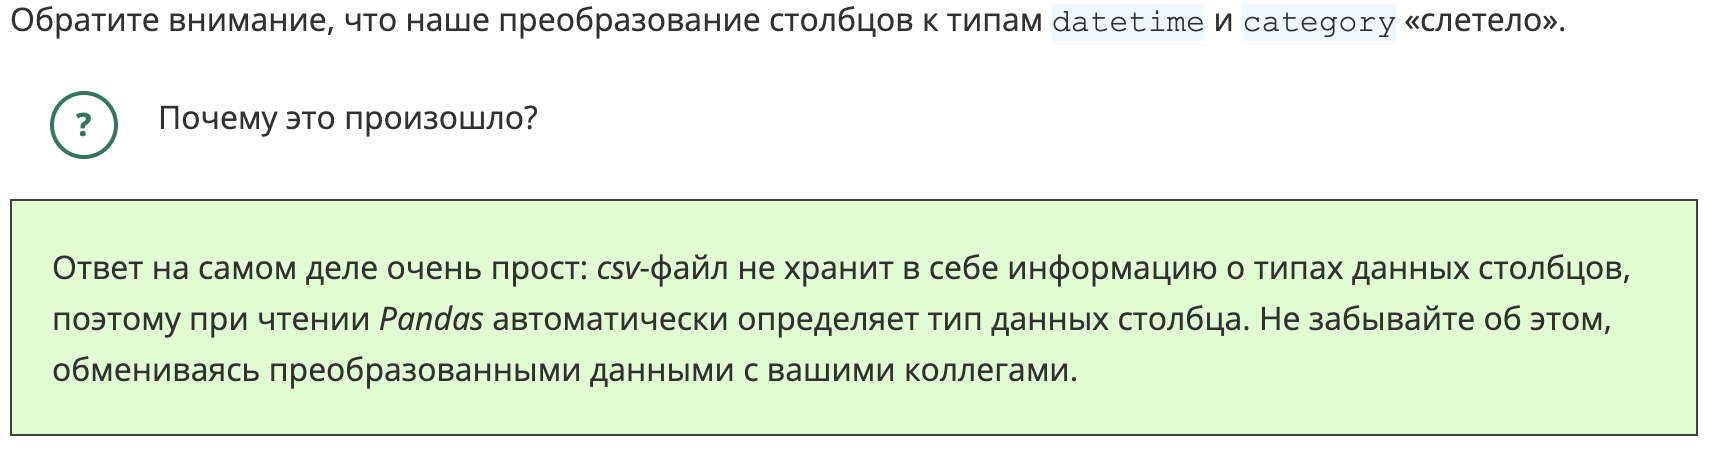

In [3]:
# Файл подгрузился верно, однако есть один нюанс. Давайте посмотрим на информацию о 
# столбцах с помощью метода info():

display(melb_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Suburb           13580 non-null  object 
 1   Rooms            13580 non-null  int64  
 2   Type             13580 non-null  object 
 3   Price            13580 non-null  float64
 4   Method           13580 non-null  object 
 5   SellerG          13580 non-null  object 
 6   Date             13580 non-null  object 
 7   Distance         13580 non-null  float64
 8   Postcode         13580 non-null  int64  
 9   Bedroom          13580 non-null  int64  
 10  Bathroom         13580 non-null  int64  
 11  Car              13580 non-null  int64  
 12  Landsize         13580 non-null  float64
 13  BuildingArea     13580 non-null  float64
 14  CouncilArea      12211 non-null  object 
 15  Lattitude        13580 non-null  float64
 16  Longtitude       13580 non-null  float64
 17  Regionname  

None

In [4]:
# Преобразуйте столбец Date в формат datetime и выделите квартал (quarter) продажи 
# объектов недвижимости. Найдите второй по популярности квартал продажи. В качестве 
# ответа запишите число объектов, проданных в этом квартале.
melb_df['Date'] = pd.to_datetime(melb_df['Date'])

In [8]:
# Функция для получения квартала
def get_quarter(month):
    if 1 <= month <= 3:
        return 1
    elif 4 <= month <= 6:
        return 2
    elif 7 <= month <= 9:
        return 3
    elif 10 <= month <= 12:
        return 4
    else:
        return 'Invalid month'

# получаем квартал    
melb_df['quarter'] = melb_df['Date'].dt.month.apply(get_quarter)
melb_df

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,MeanRoomsSquare,AreaRatio,MonthSale,AgeBuilding,WeekdaySale,StreetType,Weekend,quarter
0,Abbotsford,2,house,1480000.0,S,Biggin,2016-03-12,2.5,3067,2,1,1,202.0,126.0,Yarra,-37.79960,144.99840,Northern Metropolitan,4019,25.200000,-0.231707,3,46,5,St,1,1
1,Abbotsford,2,house,1035000.0,S,Biggin,2016-04-02,2.5,3067,2,1,0,156.0,79.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019,15.800000,-0.327660,4,116,5,St,1,2
2,Abbotsford,3,house,1465000.0,SP,Biggin,2017-04-03,2.5,3067,3,2,0,134.0,150.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019,18.750000,0.056338,4,117,0,St,0,2
3,Abbotsford,3,house,850000.0,PI,Biggin,2017-04-03,2.5,3067,3,2,1,94.0,126.0,Yarra,-37.79690,144.99690,Northern Metropolitan,4019,15.750000,0.145455,4,47,0,other,0,2
4,Abbotsford,4,house,1600000.0,VB,Nelson,2016-04-06,2.5,3067,3,1,2,120.0,142.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019,17.750000,0.083969,4,2,2,St,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,other,4,house,1245000.0,S,Barry,2017-08-26,16.7,3150,4,2,2,652.0,126.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392,12.600000,-0.676093,8,36,5,Cr,1,3
13576,Williamstown,3,house,1031000.0,SP,Williams,2017-08-26,6.8,3016,3,2,2,333.0,133.0,NaN,-37.85927,144.87904,Western Metropolitan,6380,16.625000,-0.429185,8,22,5,Dr,1,3
13577,Williamstown,3,house,1170000.0,S,Raine,2017-08-26,6.8,3016,3,2,4,436.0,126.0,NaN,-37.85274,144.88738,Western Metropolitan,6380,15.750000,-0.551601,8,20,5,St,1,3
13578,Williamstown,4,house,2500000.0,PI,Sweeney,2017-08-26,6.8,3016,4,1,5,866.0,157.0,NaN,-37.85908,144.89299,Western Metropolitan,6380,17.444444,-0.693060,8,97,5,St,1,3


In [9]:
melb_df[melb_df['quarter'] == 2]['Price'].shape[0]

4359

In [12]:
melb_df['quarter'].value_counts()

3    4873
2    4359
4    2329
1    2019
Name: quarter, dtype: int64

Преобразуйте все столбцы, в которых меньше 150 уникальных значений, в тип данных category, исключив из преобразования столбцы Date, Rooms, Bedroom, Bathroom, Car.
В качестве ответа запишите результирующее количество столбцов, которые имеют тип данных category.

In [13]:
# Определим количество уникальных значений
# Создаём пустой список
unique_list = []
# Пробегаемся по именам столбцов в таблице
for col in melb_df.columns:
    # создаём кортеж (имя столбца, число уникальных значений)
    item = (col, melb_df[col].nunique(),melb_df[col].dtypes) # добавляем кортеж в список
    unique_list.append(item) 
# создаём вспомогательную таблицу и сортируем её
unique_counts = pd.DataFrame(
    unique_list,
    columns=['Column_Name', 'Num_Unique', 'Type']
).sort_values(by='Num_Unique',  ignore_index=True)
# выводим её на экран
display(unique_counts)

,Column_Name,Num_Unique,Type
0,Weekend,2,int64
1,Type,3,object
2,quarter,4,int64
3,Method,5,object
4,WeekdaySale,7,int64
5,Regionname,8,object
6,Rooms,9,int64
7,Bathroom,9,int64
8,StreetType,11,object
9,Car,11,int64


In [14]:
# Сделаем преобразование столбцов к типу данных category:
cols_to_exclude = ['Date', 'Rooms', 'Bedroom', 'Bathroom', 'Car'] # список столбцов, которые мы не берём во внимание
max_unique_count = 150 # задаём максимальное число уникальных категорий
for col in melb_df.columns: # цикл по именам столбцов
    if melb_df[col].nunique() < max_unique_count and col not in cols_to_exclude: # проверяем условие
        melb_df[col] = melb_df[col].astype('category') # преобразуем тип столбца
display(melb_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Suburb           13580 non-null  category      
 1   Rooms            13580 non-null  int64         
 2   Type             13580 non-null  category      
 3   Price            13580 non-null  float64       
 4   Method           13580 non-null  category      
 5   SellerG          13580 non-null  category      
 6   Date             13580 non-null  datetime64[ns]
 7   Distance         13580 non-null  float64       
 8   Postcode         13580 non-null  int64         
 9   Bedroom          13580 non-null  int64         
 10  Bathroom         13580 non-null  int64         
 11  Car              13580 non-null  int64         
 12  Landsize         13580 non-null  float64       
 13  BuildingArea     13580 non-null  float64       
 14  CouncilArea      12211 non-null  categ

None

# 2. Сортировка данных в DataFrame

__МЕТОД SORT_VALUES()__

Для сортировки значений в DataFrame по значениям одного или нескольких столбцов используется метод sort_values().

Основные параметры метода sort_values()

- by — имя или список имён столбцов, по значениям которых производится сортировка.
- axis — ось, по которой производится сортировка (0 — строки, 1 — столбцы). По умолчанию сортировка производится по строкам.
- ascending — сортировка по возрастанию (от меньшего к большему). По умолчанию параметр выставлен на True, для сортировки по убыванию (от большего к меньшему) необходимо выставить его на False.
- ignore_index — создаются ли новые индексы в таблице. По умолчанию выставлен на False и сохраняет индексы изначальной таблицы.
- inplace — производится ли замена исходной таблицы на отсортированную. По умолчанию параметр выставлен на False, то есть замены не производится. Чтобы переопределить исходную таблицу на отсортированную, необходимо выставить этот параметр на True.

In [15]:
# Сортировка по значениям одного столбца
# Отсортируем таблицу по возрастанию цены объектов недвижимости (Price):

melb_df.sort_values(by='Price').head(10)

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,MeanRoomsSquare,AreaRatio,MonthSale,AgeBuilding,WeekdaySale,StreetType,Weekend,quarter
2652,Footscray,1,unit,85000.0,PI,Burnham,2016-03-09,6.4,3011,1,1,0,0.0,126.0,Maribyrnong,-37.79110,144.89000,Western Metropolitan,7570,42.000000,1.000000,3,9,2,St,0,1
1805,other,4,house,131000.0,PI,other,2017-02-25,8.9,3162,4,1,2,499.0,155.0,Glen Eira,-37.88640,145.02420,Southern Metropolitan,2379,17.222222,-0.525994,2,97,5,St,1,1
7303,Albion,1,unit,145000.0,PI,Biggin,2016-05-28,13.9,3020,2,1,1,36.0,126.0,Brimbank,-37.78330,144.82660,Western Metropolitan,2185,31.500000,0.555556,5,46,5,St,1,2
1927,Coburg,4,house,145000.0,PI,Jellis,2016-04-06,7.8,3058,3,1,1,536.0,164.0,Moreland,-37.75550,144.96580,Northern Metropolitan,11204,20.500000,-0.531429,4,106,2,Rd,0,2
7940,Hawthorn,1,unit,160000.0,VB,HAR,2017-08-04,4.6,3122,1,1,0,322.0,126.0,Boroondara,-37.81980,145.03730,Southern Metropolitan,11308,42.000000,-0.437500,8,8,4,St,0,3
12666,Brunswick,1,unit,170000.0,VB,Nelson,2017-09-16,5.2,3056,1,1,0,1250.0,126.0,NaN,-37.77685,144.95188,Northern Metropolitan,11918,42.000000,-0.816860,9,47,5,St,1,3
8811,Footscray,1,unit,170000.0,PI,Burnham,2017-01-07,5.1,3011,1,1,0,30.0,26.0,Maribyrnong,-37.80141,144.89587,Western Metropolitan,7570,8.666667,-0.071429,1,4,5,St,1,1
8504,West Footscray,1,unit,185000.0,PI,Jas,2017-04-29,8.2,3012,1,1,1,0.0,126.0,Maribyrnong,-37.79800,144.86720,Western Metropolitan,5058,42.000000,1.000000,4,47,5,St,1,2
7293,Albion,1,unit,185000.0,S,hockingstuart,2016-08-22,13.9,3020,1,1,1,2347.0,43.0,Brimbank,-37.78520,144.82720,Western Metropolitan,2185,14.333333,-0.964017,8,41,0,Rd,0,3
7305,Albion,2,unit,190000.0,SP,Burnham,2016-07-30,13.9,3020,2,1,1,0.0,126.0,Brimbank,-37.78390,144.82390,Western Metropolitan,2185,25.200000,1.000000,7,46,5,St,1,3


In [16]:
# Отсортируем таблицу по убыванию (от самой последней до самой первой) даты продажи 
# объекта (Date). Для этого выставим параметр ascending на False:

melb_df.sort_values(by='Date', ascending=False)

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,MeanRoomsSquare,AreaRatio,MonthSale,AgeBuilding,WeekdaySale,StreetType,Weekend,quarter
11144,Northcote,4,house,1955000.0,SP,McGrath,2017-12-08,5.3,3070,4,2,1,5.0,126.0,Darebin,-37.76280,144.99375,Northern Metropolitan,11364,12.600000,0.923664,12,47,4,St,0,4
11217,Surrey Hills,3,house,1775000.0,PI,Jellis,2017-12-08,10.2,3127,3,2,2,780.0,126.0,Boroondara,-37.81403,145.08968,Southern Metropolitan,5457,15.750000,-0.721854,12,47,4,Rd,0,4
11206,St Kilda,4,house,1600000.0,VB,Gary,2017-12-08,5.0,3182,4,2,3,613.0,160.0,Port Phillip,-37.86667,144.98324,Southern Metropolitan,13240,16.000000,-0.586028,12,107,4,St,0,4
11207,Strathmore,7,house,2000000.0,SP,Nelson,2017-12-08,8.2,3041,7,3,4,608.0,355.0,Moonee Valley,-37.73681,144.90587,Western Metropolitan,3284,20.882353,-0.262721,12,18,4,Rd,0,4
11208,Strathmore,4,house,1610000.0,S,other,2017-12-08,8.2,3041,4,3,2,861.0,274.0,Moonee Valley,-37.73154,144.92243,Western Metropolitan,3284,24.909091,-0.517181,12,62,4,St,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,Camberwell,4,house,2650000.0,S,Jellis,2016-03-09,7.8,3124,4,2,1,652.0,189.0,Boroondara,-37.82860,145.06860,Southern Metropolitan,8920,18.900000,-0.550535,3,126,2,Rd,0,1
4510,Oak Park,3,house,892000.0,S,Nelson,2016-03-09,11.5,3046,3,1,3,757.0,126.0,Moreland,-37.71800,144.91740,Northern Metropolitan,2651,18.000000,-0.714609,3,46,2,St,0,1
4388,Northcote,3,house,1200000.0,S,Nelson,2016-03-09,5.5,3070,3,1,1,215.0,125.0,Darebin,-37.77590,144.99090,Northern Metropolitan,11364,17.857143,-0.264706,3,96,2,St,0,1
6184,Surrey Hills,3,house,1205000.0,S,Fletchers,2016-01-28,11.2,3127,3,1,2,490.0,126.0,Whitehorse,-37.83610,145.10060,Southern Metropolitan,5457,18.000000,-0.590909,1,46,3,Rd,0,1


#### СОРТИРОВКА ПО ЗНАЧЕНИЯМ НЕСКОЛЬКИХ СТОЛБЦОВ

Для сортировки по значениям нескольких столбцов необходимо передать названия этих столбцов в параметр by в виде списка. При этом важно обращать внимание на порядок следования столбцов.

Так, например, отсортируем таблицу сначала по возрастанию расстояния от центра города (Distance), а затем — по возрастанию цены объекта (Price). Для того чтобы вывод был более наглядным, выделим каждую десятую строку из столбцов Distance и Price результирующей таблицы:

In [17]:
melb_df.sort_values(by=['Distance', 'Price']).loc[::10, ['Distance', 'Price']]

,Distance,Price
11428,0.0,387000.0
10512,0.7,600000.0
5727,1.2,485000.0
8671,1.2,595000.0
5736,1.2,740000.0
...,...,...
12011,38.0,680000.0
10673,38.0,810000.0
13429,38.0,1155000.0
11102,41.0,650000.0


In [18]:
melb_df.sort_values(by=['Price', 'Distance']).loc[::10, ['Distance', 'Price']]

,Distance,Price
2652,6.4,85000.0
7116,7.8,200000.0
5206,11.2,220000.0
7240,8.2,241000.0
2898,13.0,250000.0
...,...,...
13341,6.3,4060000.0
8591,1.5,4275000.0
1094,11.2,4700000.0
5801,6.1,5046000.0


__КОМБИНИРОВАНИЕ СОРТИРОВКИ С ФИЛЬТРАЦИЕЙ__

Найдём информацию о таунхаусах (Type), проданных компанией (SellerG) McGrath, у которых коэффициент соотношения площадей здания и участка (AreaRatio) меньше -0.8. Результат отсортируем по дате продажи (Date) в порядке возрастания, а после проведём сортировку по убыванию коэффициента соотношения площадей. Также обновим старые индексы на новые, установив параметр ignore_index на True. Для наглядности результата выберем из таблицы только столбцы Data и AreaRatio:

In [19]:
mask1 = melb_df['AreaRatio'] < -0.8
mask2 = melb_df['Type'] == 'townhouse'
mask3 = melb_df['SellerG'] == 'McGrath'
melb_df[mask1 & mask2 & mask3].sort_values(
    by=['Date', 'AreaRatio'],
    ascending=[True, False],
    ignore_index=True
).loc[:, ['Date', 'AreaRatio']]

,Date,AreaRatio
0,2016-07-26,-0.974922
1,2016-09-24,-0.971831
2,2016-11-27,-0.953608
3,2016-12-11,-0.945946
4,2017-08-04,-0.947368
5,2017-08-04,-0.970874


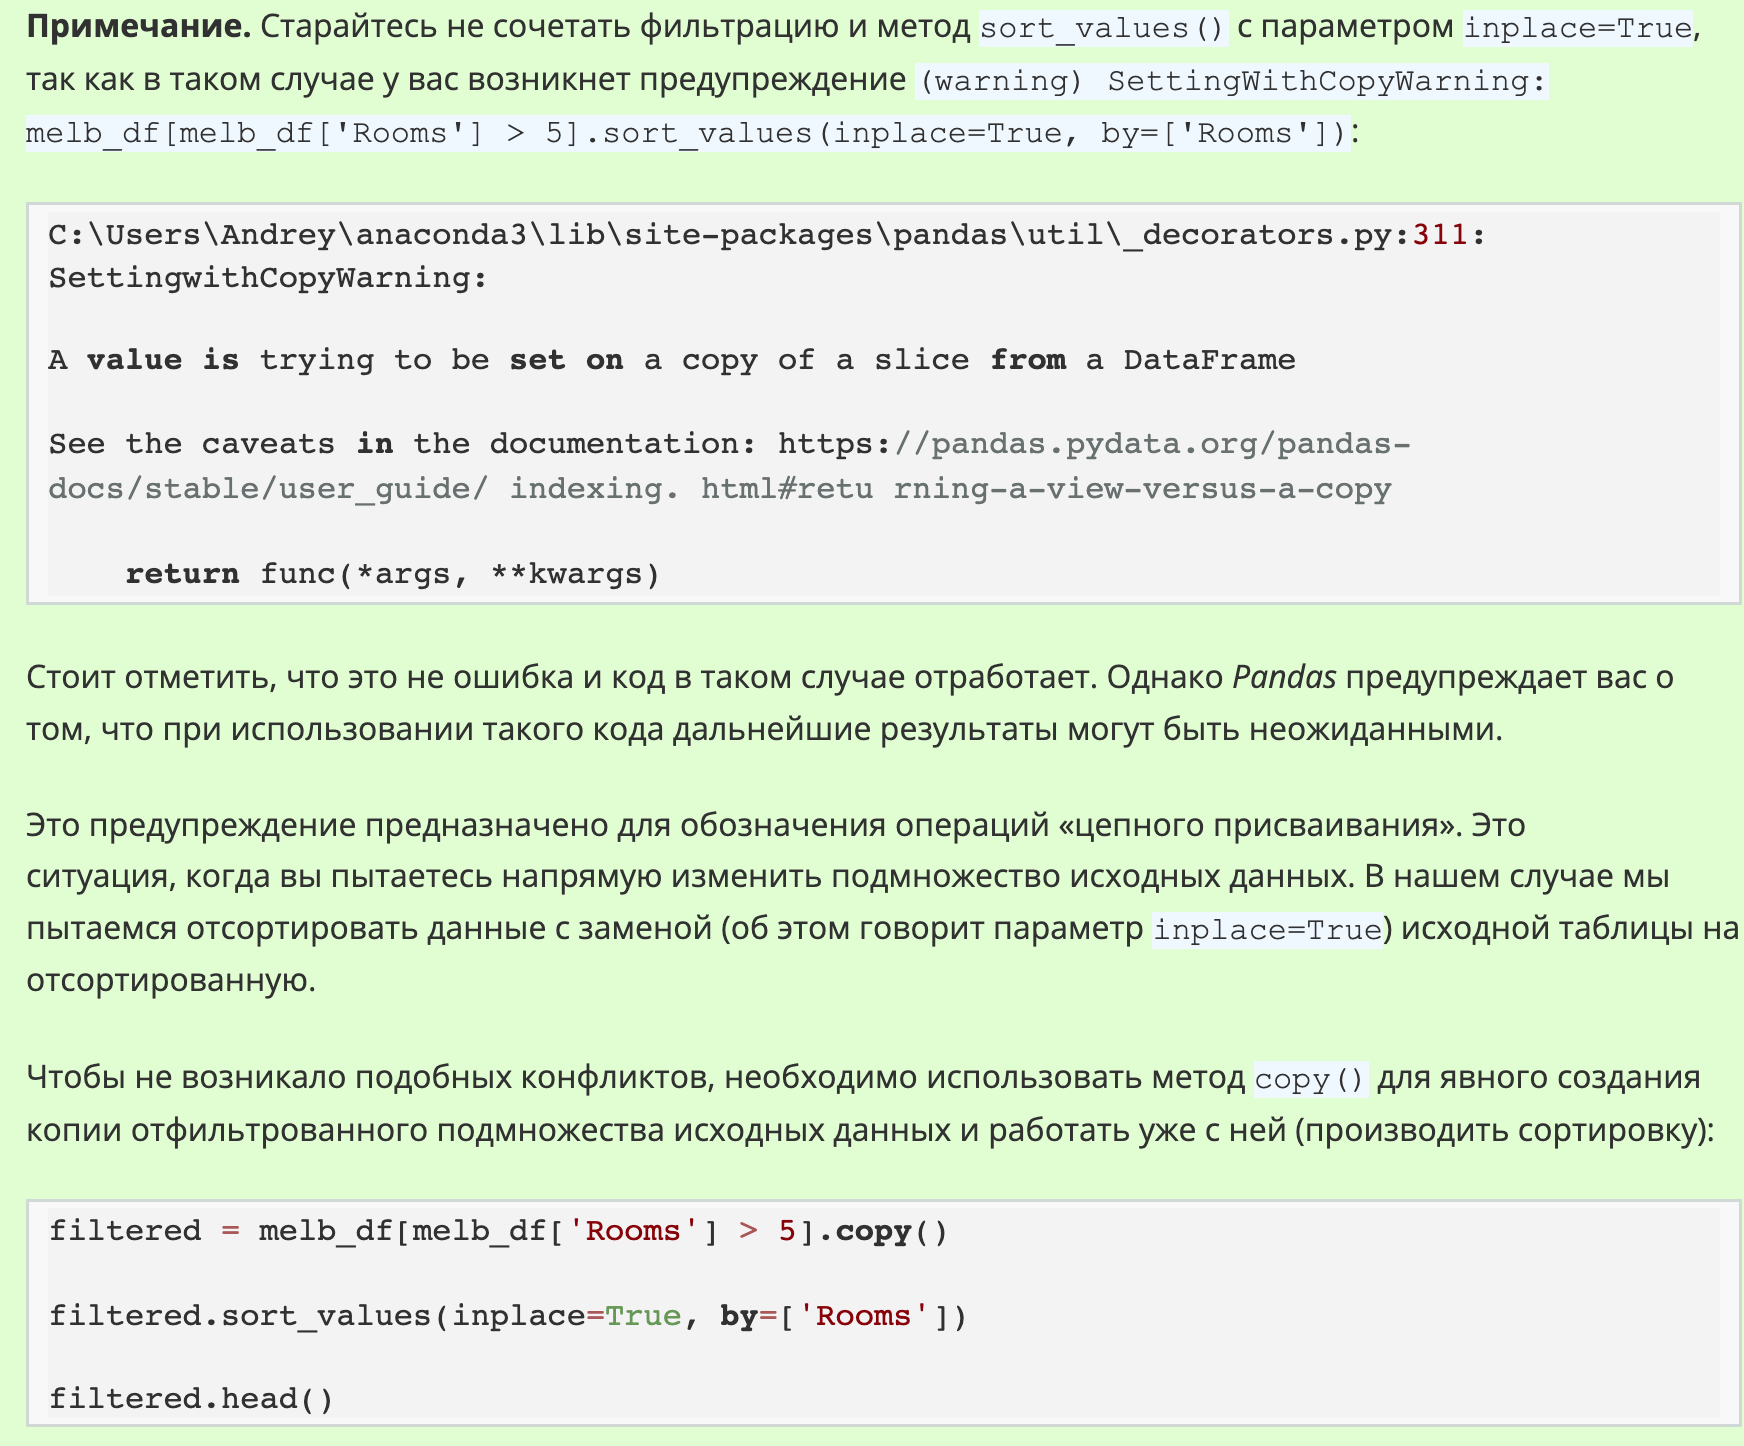

Произведите сортировку столбца AreaRatio по убыванию. При этом индексы полученной таблицы замените на новые. Какое значение площади здания находится в строке 1558? Ответ округлите до целого числа.

In [37]:
melb_df.sort_values(by='AreaRatio', ascending=False, ignore_index=True).loc[1558]['BuildingArea']

126.0

Найдите таунхаусы (Type) с количеством жилых комнат (Rooms) больше 2. Отсортируйте полученную таблицу сначала по возрастанию числа комнат, а затем по убыванию средней площади комнат (MeanRoomsSquare). Индексы таблицы замените на новые. Какая цена будет у объекта в строке 18? Ответ запишите в виде целого числа.

In [44]:
melb_df[(melb_df['Type'] == 'townhouse') & (melb_df['Rooms'] > 2)
       ].sort_values(by=['Rooms', 'MeanRoomsSquare'], ascending=[True, False], 
                     ignore_index=True).loc[18]['Price']

1300000.0

# 3. Группировка данных в DataFrame

Так или иначе, владение группировкой — важный навык, который открывает новые возможности по работе с данными.

__МЕТОД GROUPBY()__

В библиотеке Pandas для группировки данных по одному или нескольким признакам можно использовать метод groupby().

Основные параметры метода groupby()

- by — имя или список имён столбцов, по которым производится группировка.
- axis — ось, по которой производится группировка (0 — строки, 1 — столбцы). По умолчанию группировка производится по строкам.
- as_index — добавляется ли дополнительный индекс к таблице. По умолчанию установлен на True.

Метод groupby() возвращает объект DataFrameGroupBy, который хранит в себе информацию о том, какие строки относятся к определённой группе, и сам по себе не представляет для нас интереса. 

Однако к этому объекту можно применять уже знакомые нам агрегирующие методы (mean, median, sum и т. д.), чтобы рассчитывать показатели внутри каждой группы.

Посмотрим на общую схему работы метода groupby() в Pandas: